In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [7]:
# Load the dataset
df = pd.read_csv("scrubbed.csv", low_memory=False)

In [8]:
# Clean the dataset
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce") # Convert datetime column to datetime format
df["country"] = df["country"].fillna("unknown") # Fill missing values in country column with "unknown"
df["shape"] = df["shape"].fillna("other") # Fill missing values in shape column with "other"
df["duration (seconds)"] = pd.to_numeric(df["duration (seconds)"], errors="coerce") # Convert duration column to numeric format

In [9]:
# Create a new column for year
df["year"] = df["datetime"].dt.year

In [ ]:
# Filter out rows with missing or invalid values
df = df[(df["datetime"].notnull()) & (df["country"] != "unknown") & (df["shape"] != "other") & (df["duration (seconds)"].notnull()) & (df["year"].notnull())]


In [10]:
# Reset the index
df = df.reset_index(drop=True)


In [11]:
# Explore the dataset
print(df.shape) # (63553, 12)
print(df.columns) # ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)', 'duration (hours/min)', 'comments', 'date posted', 'latitude', 'longitude', 'year']
print(df.head())

(80332, 12)
Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'year'],
      dtype='object')
             datetime                  city state  country     shape   
0 1949-10-10 20:30:00            san marcos    tx       us  cylinder  \
1 1949-10-10 21:00:00          lackland afb    tx  unknown     light   
2 1955-10-10 17:00:00  chester (uk/england)   NaN       gb    circle   
3 1956-10-10 21:00:00                  edna    tx       us    circle   
4 1960-10-10 20:00:00               kaneohe    hi       us     light   

   duration (seconds) duration (hours/min)   
0              2700.0           45 minutes  \
1              7200.0              1-2 hrs   
2                20.0           20 seconds   
3                20.0             1/2 hour   
4               900.0           15 minutes   

                                            comments date posted    latitude  

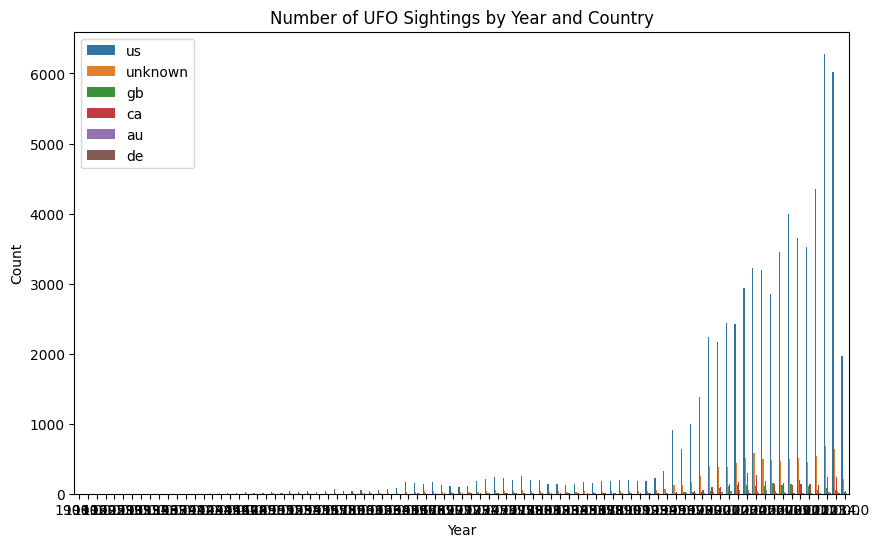

In [12]:
# Visualize the number of sightings by year and country
plt.figure(figsize=(10,6))
sns.countplot(x="year", hue="country", data=df)
plt.title("Number of UFO Sightings by Year and Country")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.show()


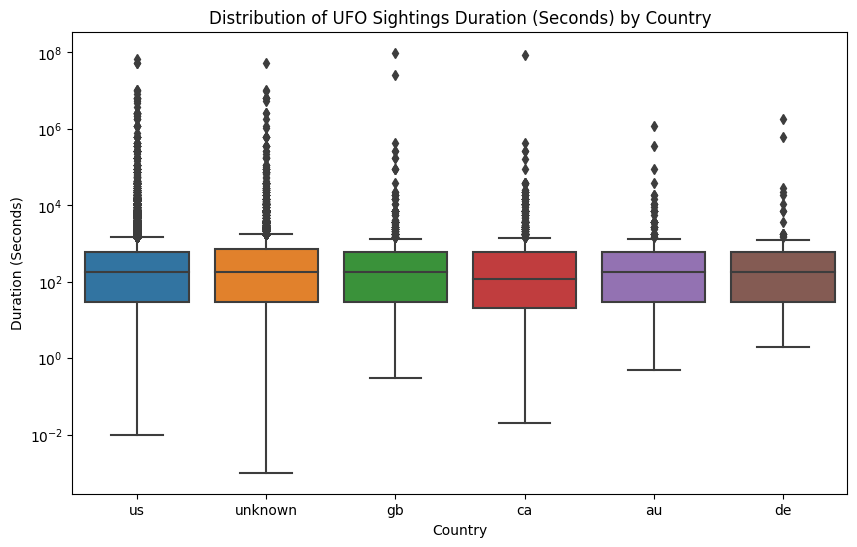

In [13]:
# Visualize the distribution of duration (seconds) by country
plt.figure(figsize=(10,6))
sns.boxplot(x="country", y="duration (seconds)", data=df)
plt.title("Distribution of UFO Sightings Duration (Seconds) by Country")
plt.xlabel("Country")
plt.ylabel("Duration (Seconds)")
plt.yscale("log") # Use log scale to see outliers better
plt.show()

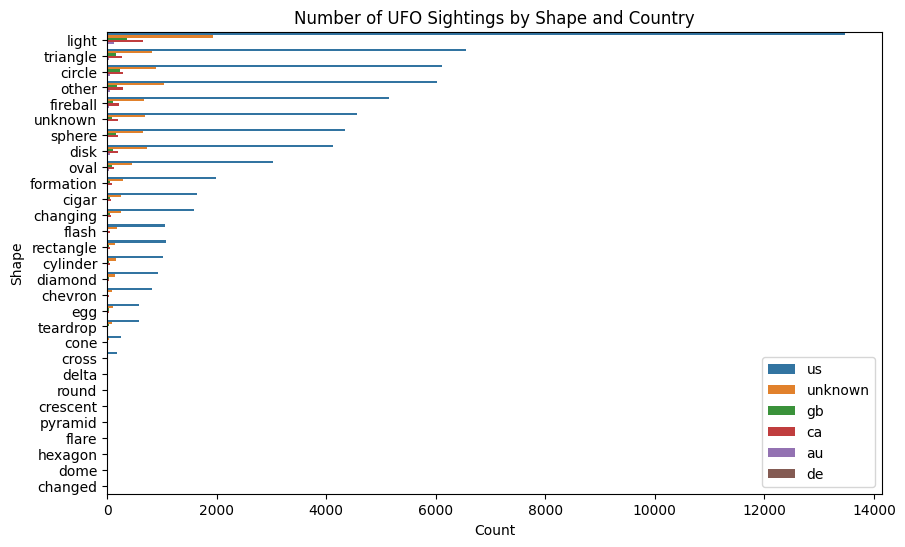

In [14]:
# Visualize the number of sightings by shape and country
plt.figure(figsize=(10,6))
sns.countplot(y="shape", hue="country", data=df, order=df["shape"].value_counts().index)
plt.title("Number of UFO Sightings by Shape and Country")
plt.xlabel("Count")
plt.ylabel("Shape")
plt.legend(loc="lower right")
plt.show()